Aquest codi llegeix els fitxers amb les dades de les estadístiques dels jugadors i en treu les classificacions.

In [1]:
#!pip install numpy==1.25.2
#!pip uninstall xarray scipy netCDF4
#!pip install xarray scipy netCDF4
#!pip install pybin11 --upgrade

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

In [3]:
# Definim tab20 com la paleta per defecte dels plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20.colors)

In [4]:
# Llegim les dades
dataarray = xr.open_dataset('stats.nc', engine='scipy')
dataarray

<xarray.Dataset> Size: 9kB
Dimensions:              (player: 15, matchday: 13)
Coordinates:
  * player               (player) object 120B 'Alejandro' 'Antía' ... 'Víctor'
  * matchday             (matchday) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    GamesPlayed          (matchday, player) int32 780B ...
    WinPlayed            (matchday, player) float64 2kB ...
    Scored               (matchday, player) float64 2kB ...
    ScoredPlayed         (matchday, player) float64 2kB ...
    ScoredAttackPlayed   (matchday, player) float64 2kB ...
    ScoredDefensePlayed  (matchday, player) float64 2kB ...

In [5]:
# Extreiem els noms dels jugadors i les jornades
players_names = dataarray['player'].astype(str).values # noms dels jugadors
matchdays = dataarray['matchday'] # array de números de jornades

In [6]:
# Filtrem els jugadors que han jugat menys partits
#TODO

In [7]:
# Extreiem els valors de victòries / jugats de l'última jornada
winplayed_values = dataarray['WinPlayed'].isel(matchday = -1).values

# Ordenem de major a menor
winplayed_sorted_idx = np.argsort(winplayed_values)[::-1] # índexs d'ordre (revertim per fer de major a menor)
winplayed_sorted = winplayed_values[winplayed_sorted_idx] # ordenem
winplayed_sorted = np.round(winplayed_sorted, 2) # arrondonim els valors a 2 xifres decimals

players_names_sorted = players_names[winplayed_sorted_idx] # ordenem els noms dels jugadors

#Posem els resultats a una taula (DataFrame)
winplayed_stats = pd.DataFrame(np.array([players_names_sorted, winplayed_sorted]).T, index = np.arange(1, players_names_sorted.shape[0]+1))
caption = "Games won / Games played (Matchday %.1d)" % (matchdays[-1])
winplayed_stats = winplayed_stats.style.set_caption(caption) # afegim títol al dataframe

# Guardem la taula en HTML per mostrar-la al README
winplayed_stats.to_html('results/winplayed_stats.html')

winplayed_stats

,0,1
1,Simone,1.0
2,Tiziano,0.5
3,Pablo,0.5
4,Alejandro,0.33
5,Rebeca,0.22
6,Elena,0.2
7,Víctor,0.14
8,Pedro,0.12
9,Antía,0.06
10,Pau,0.05


### Gràfic

Fem un gràfic de l'evolució dels paràmetres durant les jornades

In [9]:
def plot_matchday_evolution(parameter, ax, label=False):
    #Extract parameter values
    parameter_values = dataarray[parameter]
    
    for player in players_names: #for each player
        parameter_evolution = parameter_values.sel(player=player) # extract player data
        parameter_evolution_values = parameter_evolution.values # extract player data values

        if label:
            ax.plot(matchdays, parameter_evolution_values, marker = 'o', label=player) #plot
        else:
            ax.plot(matchdays, parameter_evolution_values, marker = 'o', label=player) #plot
        

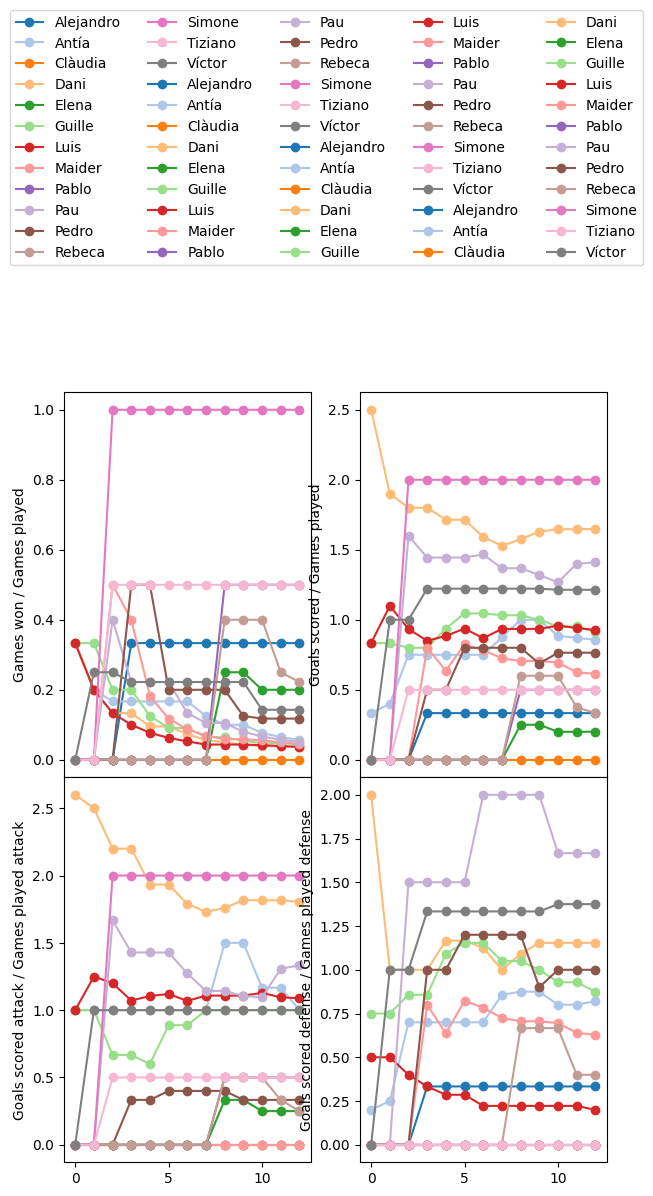

In [12]:
# Initialize figure
fig, axs = plt.subplots(figsize=(7, 10), ncols= 2, nrows = 2, sharex=True)
axs = axs.flatten()

plot_matchday_evolution('WinPlayed', axs[0])
plot_matchday_evolution('ScoredPlayed', axs[1])
plot_matchday_evolution('ScoredAttackPlayed', axs[2])
plot_matchday_evolution('ScoredDefensePlayed', axs[3])

axs[1].set_xlabel("Matchday")
axs[0].set_ylabel("Games won / Games played")
axs[1].set_ylabel("Goals scored / Games played")
axs[2].set_ylabel("Goals scored attack / Games played attack")
axs[3].set_ylabel("Goals scored defense / Games played defense")

fig.legend(bbox_to_anchor = ( 0.5, 1.), ncol = 5, loc = 'lower center')

# Guardem la figura per poderla posar al README
plt.subplots_adjust(hspace=0.0)
plt.savefig('results/winplayed_stats.png', dpi=300, bbox_inches='tight')